In [1]:
# Round 2

In [2]:
#1. Show the dataframe shape.
#2. Standardize header names.
#3. Which columns are numerical?
#4. Which columns are categorical?
#5. Check and deal with NaN values.
#6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
#BONUS: Put all the previously mentioned data transformations into a function.

In [3]:
import pandas as pd
import numpy as np

In [4]:
#1. Show the dataframe shape.

In [5]:
unique_name = pd.read_csv('marketing_customer_analysis.csv')

In [6]:
data = pd.read_csv('marketing_customer_analysis.csv')
data

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [7]:
data.shape

(10910, 26)

In [8]:
columns_names = data.columns
columns_names

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [9]:
#cols = []
# for column is data.columns:
#     cols.append(column.lower())
# data.columns = cols
# data

In [10]:
data.dtypes

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [11]:
data.select_dtypes(object)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data.select_dtypes(include=numerics)

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [13]:
data._get_numeric_data()


,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [14]:
data.isna().sum()

Unnamed: 0                          0
Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [15]:
data['State'].value_counts(dropna=False)

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
NaN            631
Name: State, dtype: int64

In [16]:
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'])

In [17]:
data

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [18]:
data['Month'] = data ['Effective To Date'].dt.month_name()

In [19]:
data

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,February
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,January
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,February
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February


In [20]:
data ['Vehicle Type'].value_counts(dropna=False)

NaN    5482
A      5428
Name: Vehicle Type, dtype: int64

In [21]:
data ['Vehicle Size'].value_counts(dropna=False)

Medsize    7251
Small      1966
Large      1071
NaN         622
Name: Vehicle Size, dtype: int64

In [22]:
data ['Vehicle Class'].value_counts(dropna=False)

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
NaN               622
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: Vehicle Class, dtype: int64

In [23]:
data ['Policy Type'].value_counts(dropna=False)

Personal Auto     8128
Corporate Auto    2341
Special Auto       441
Name: Policy Type, dtype: int64

In [24]:
data[data['Vehicle Type'].isna()==True].head(60)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,February
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,January
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,January
6,6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN,February
7,7,IH64929,California,4956.247235,No,Basic,High School or Below,2011-02-24,Employed,M,...,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,NaN,February
8,8,FM55990,California,5989.773931,Yes,Premium,College,2011-01-19,Employed,M,...,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN,January
9,9,QX31376,Oregon,17114.328150,No,Extended,Master,2011-01-04,Employed,F,...,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,NaN,January
11,11,GE63585,NaN,2420.711888,NaN,Basic,Bachelor,2011-02-07,Employed,M,...,1,Corporate Auto,Corporate L3,Offer1,Call Center,199.551735,Two-Door Car,Medsize,NaN,February
12,12,EO51920,Oregon,19955.257130,No,Extended,High School or Below,2011-01-31,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Agent,64.669515,Four-Door Car,Medsize,NaN,January
14,14,TL59568,Arizona,12836.009510,No,Premium,High School or Below,2011-02-28,Unemployed,M,...,2,Personal Auto,Personal L2,Offer3,Agent,835.200000,Two-Door Car,Medsize,NaN,February


In [25]:
data['Vehicle Type'] = data['Vehicle Type'].fillna("M") #I made an assumption that this is be M for manual versus A for Automatic

In [26]:
data ['Vehicle Type'].value_counts(dropna=False)

M    5482
A    5428
Name: Vehicle Type, dtype: int64

In [27]:
data ['Vehicle Size'].value_counts(dropna=False)

Medsize    7251
Small      1966
Large      1071
NaN         622
Name: Vehicle Size, dtype: int64

In [28]:
data[data['Vehicle Size'].isna()==True].head(60)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
87,87,ZH92587,Oregon,8126.766397,No,Basic,College,2011-02-22,Disabled,F,...,3,Personal Auto,Personal L3,Offer1,Agent,513.600000,NaN,NaN,M,February
88,88,CJ51511,Arizona,13466.920710,Yes,Basic,High School or Below,2011-02-23,Disabled,F,...,2,Corporate Auto,Corporate L3,Offer2,Agent,571.200000,NaN,NaN,M,February
89,89,ME37450,Arizona,5210.348372,No,Basic,Bachelor,2011-01-04,Employed,M,...,5,Special Auto,Special L2,Offer1,Agent,37.960537,NaN,NaN,A,January
97,97,CA22248,Oregon,2505.420430,No,Basic,Master,2011-02-14,Employed,F,...,1,Personal Auto,Personal L3,Offer2,Branch,46.278027,NaN,NaN,A,February
148,148,HB24005,California,2347.048112,No,Basic,College,2011-02-02,Employed,M,...,1,Personal Auto,Personal L1,Offer1,Agent,244.269407,NaN,NaN,A,February
163,163,TP34946,California,5108.038755,No,Basic,College,2011-01-09,Disabled,M,...,8,Corporate Auto,Corporate L3,Offer3,Branch,482.400000,NaN,NaN,M,January
186,186,BG42047,Nevada,2511.944048,No,Basic,College,2011-01-15,Medical Leave,M,...,1,Personal Auto,Personal L3,Offer3,Web,312.000000,NaN,NaN,A,January
205,205,YZ19736,Arizona,2580.849899,Yes,Basic,College,2011-02-09,Employed,M,...,1,Personal Auto,Personal L2,Offer2,Web,316.800000,NaN,NaN,A,February
224,224,KL65897,California,6331.338496,No,Extended,Bachelor,2011-02-21,Unemployed,F,...,3,Personal Auto,Personal L2,Offer1,Branch,94.714302,NaN,NaN,A,February
261,261,HZ56678,Oregon,2780.196856,No,Basic,High School or Below,2011-01-12,Disabled,F,...,1,Personal Auto,Personal L2,Offer4,Web,345.600000,NaN,NaN,A,January


In [29]:
data.shape

(10910, 27)

In [30]:
data = data.drop_duplicates() 
data.shape

(10910, 27)

In [31]:
#data['State'].value_counts(dropna=False)
data['State'] = data['State'].fillna("California")
data ['State'].value_counts(dropna=False)

California    4183
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: State, dtype: int64

In [32]:
data = data.drop(columns="Unnamed: 0")
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,February
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,February
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February


In [33]:
data ['Month'].value_counts(dropna=False) #It only has January and February

January     5818
February    5092
Name: Month, dtype: int64

In [34]:
data.isna().sum()

Customer                           0
State                              0
Customer Lifetime Value            0
Response                         631
Coverage                           0
Education                          0
Effective To Date                  0
EmploymentStatus                   0
Gender                             0
Income                             0
Location Code                      0
Marital Status                     0
Monthly Premium Auto               0
Months Since Last Claim          633
Months Since Policy Inception      0
Number of Open Complaints        633
Number of Policies                 0
Policy Type                        0
Policy                             0
Renew Offer Type                   0
Sales Channel                      0
Total Claim Amount                 0
Vehicle Class                    622
Vehicle Size                     622
Vehicle Type                       0
Month                              0
dtype: int64

In [35]:
data = data.dropna()

In [36]:
data ['Response'].value_counts(dropna=False) #Response could be individuals who could have never made a claim

No     7826
Yes    1308
Name: Response, dtype: int64

In [37]:
data ['Months Since Last Claim'].value_counts(dropna=False) #NaN could be individuals who could have never made a claim

3.0     381
6.0     364
1.0     345
4.0     335
7.0     333
2.0     329
0.0     314
5.0     313
10.0    306
11.0    297
16.0    295
15.0    286
13.0    285
8.0     279
12.0    273
14.0    268
17.0    263
9.0     250
19.0    246
23.0    239
25.0    236
21.0    233
20.0    231
18.0    229
22.0    218
24.0    211
29.0    206
28.0    201
31.0    190
26.0    186
30.0    182
27.0    182
33.0    179
34.0    169
35.0    142
32.0    138
Name: Months Since Last Claim, dtype: int64

In [38]:
#ROUND 3

In [39]:
import matplotlib.pyplot as plt
import scipy.stats as stats

In [40]:
data2 = data.dropna(subset=['Response','Months Since Last Claim' , 'Number of Open Complaints']) # I decided to drop null values since we will be specifically analyzing this data
data2

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,February
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,M,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,January
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,February
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,February


In [41]:
data2.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Vehicle Type                     0
Month                            0
dtype: int64

In [42]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [43]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Customer Lifetime Value        9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective To Date              9134 non-null   datetime64[ns]
 7   EmploymentStatus               9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location Code                  9134 non-null   object        
 11  Marital Status  

In [44]:
response_data = data2 ['Response'].value_counts(dropna=False)
response_data 

No     7826
Yes    1308
Name: Response, dtype: int64

<AxesSubplot:xlabel='Response', ylabel='count'>

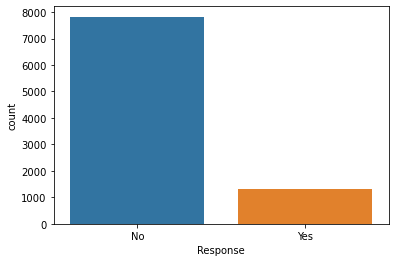

In [45]:
import seaborn as sns
sns.countplot(x="Response", data=data2)

In [46]:
def function (x):
    if x == 'Yes':
        return 1
    else:
        return 0

data2['response rate'] = data2['Response'].apply(function)
data2

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month,response rate
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,February,0
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,January,0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February,0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,M,February,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,January,0
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,February,0
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January,0
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,February,0


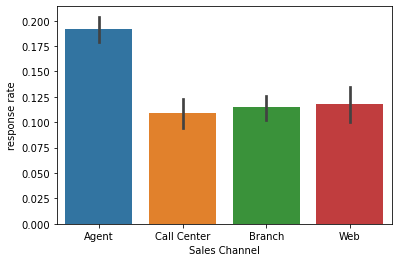

In [47]:
sns.barplot(x='Sales Channel', y='response rate', data = data2)
plt.show()

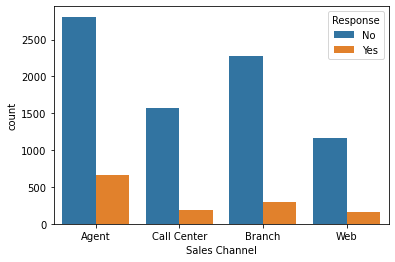

In [48]:
sns.countplot(x='Sales Channel', hue='Response', data = data2)
plt.show()

<AxesSubplot:xlabel='Response', ylabel='Total Claim Amount'>

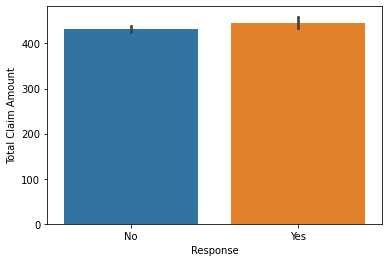

In [49]:
sns.barplot(x='Response', y='Total Claim Amount', data = data2)


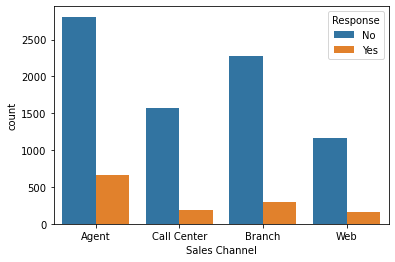

In [50]:
sns.countplot(x='Sales Channel', hue='Response', data = data2)
plt.show()

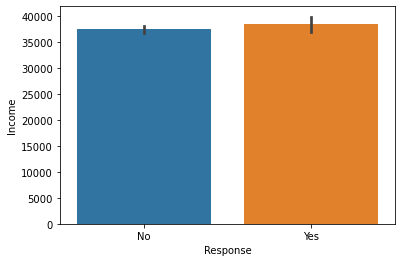

In [51]:
sns.barplot(x='Response', y='Income', data = data2)
plt.show()

In [52]:
#ROUND 4

In [53]:
data2.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                 float64
Months Since Policy Inception             int64
Number of Open Complaints               float64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [54]:
numericals = data2._get_numeric_data()
numericals

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,response rate
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,0
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,0
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,0
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,0
...,...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000,0
10904,19228.463620,0,187,14.0,32,0.0,2,897.600000,0
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,0
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,0


In [55]:
categoricals = data2.select_dtypes(object)
categoricals

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M,February
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M,January
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,February
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,January
6,IW72280,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,M,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A,January
10904,QI63521,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A,February
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A,January
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,M,February


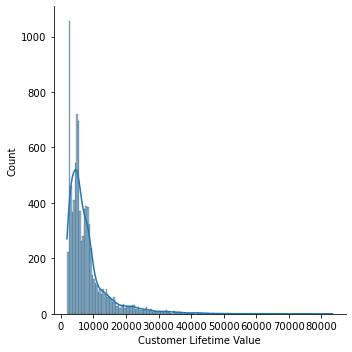

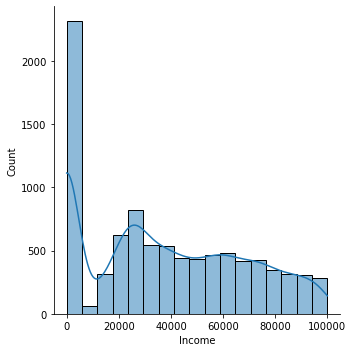

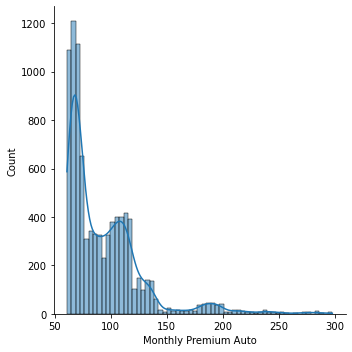

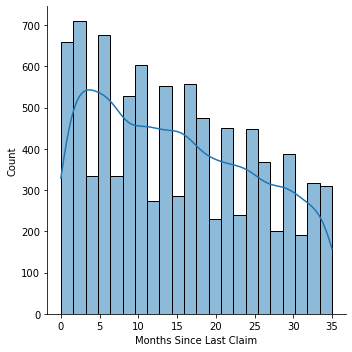

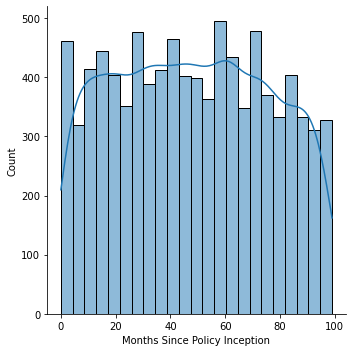

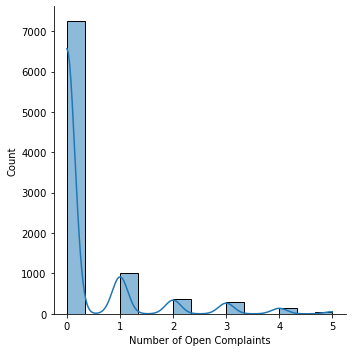

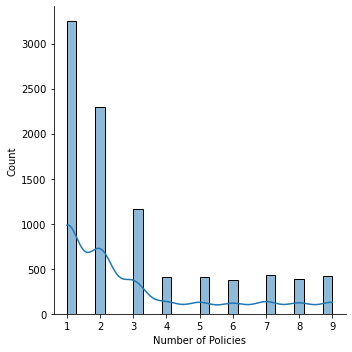

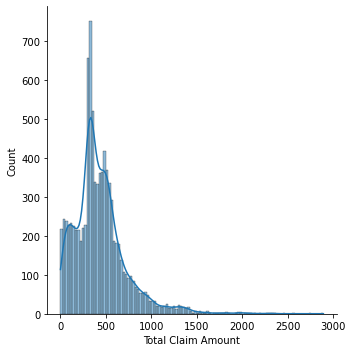

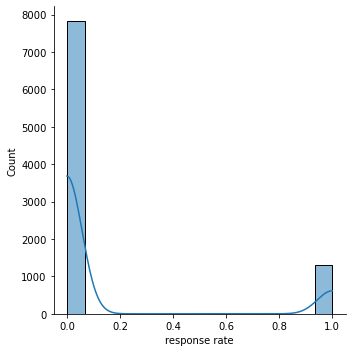

In [56]:
for i, column in enumerate(numericals.columns, 1):
    sns.displot(numericals[column], kde=True)


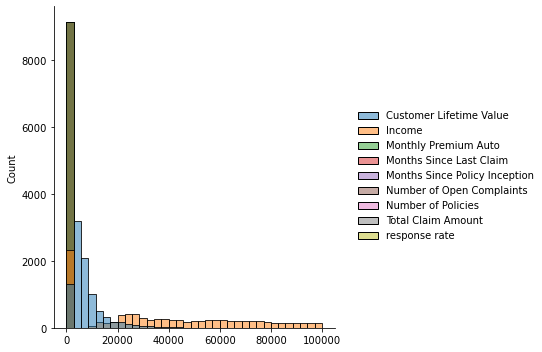

In [57]:
sns.displot(numericals, bins=35)
plt.show()

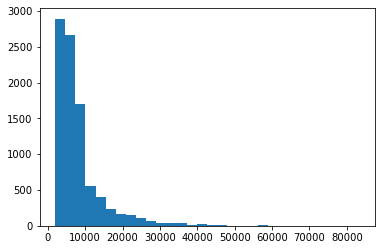

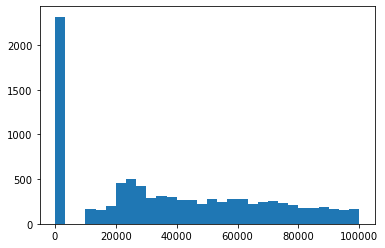

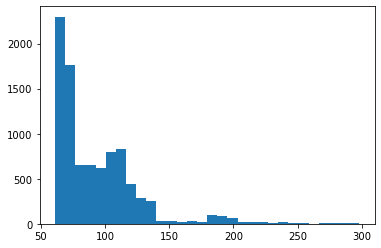

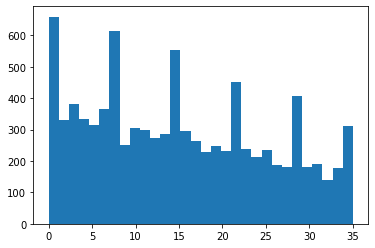

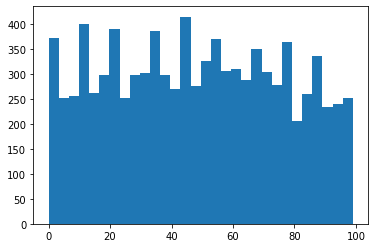

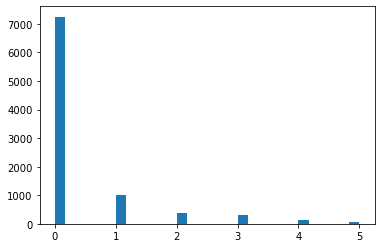

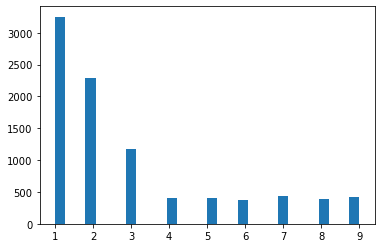

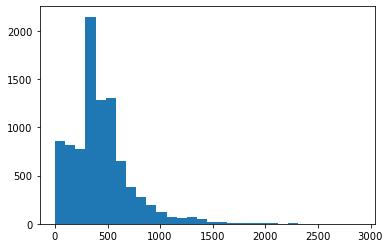

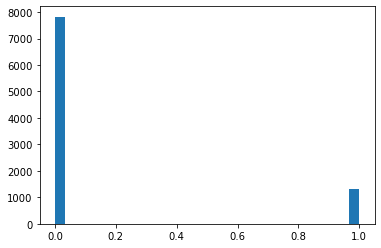

In [58]:
for column in numericals.columns:
    plt.hist(x=column, data=numericals, bins=30)
    plt.show()

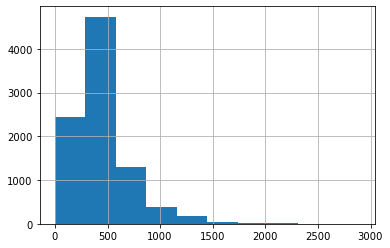

In [59]:
numericals['Total Claim Amount'].hist() #I thought this one looked like the most normal distribution but up close it's not the case
plt.show()

array([[<AxesSubplot:title={'center':'Customer Lifetime Value'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Monthly Premium Auto'}>],
       [<AxesSubplot:title={'center':'Months Since Last Claim'}>,
        <AxesSubplot:title={'center':'Months Since Policy Inception'}>,
        <AxesSubplot:title={'center':'Number of Open Complaints'}>],
       [<AxesSubplot:title={'center':'Number of Policies'}>,
        <AxesSubplot:title={'center':'Total Claim Amount'}>,
        <AxesSubplot:title={'center':'response rate'}>]], dtype=object)

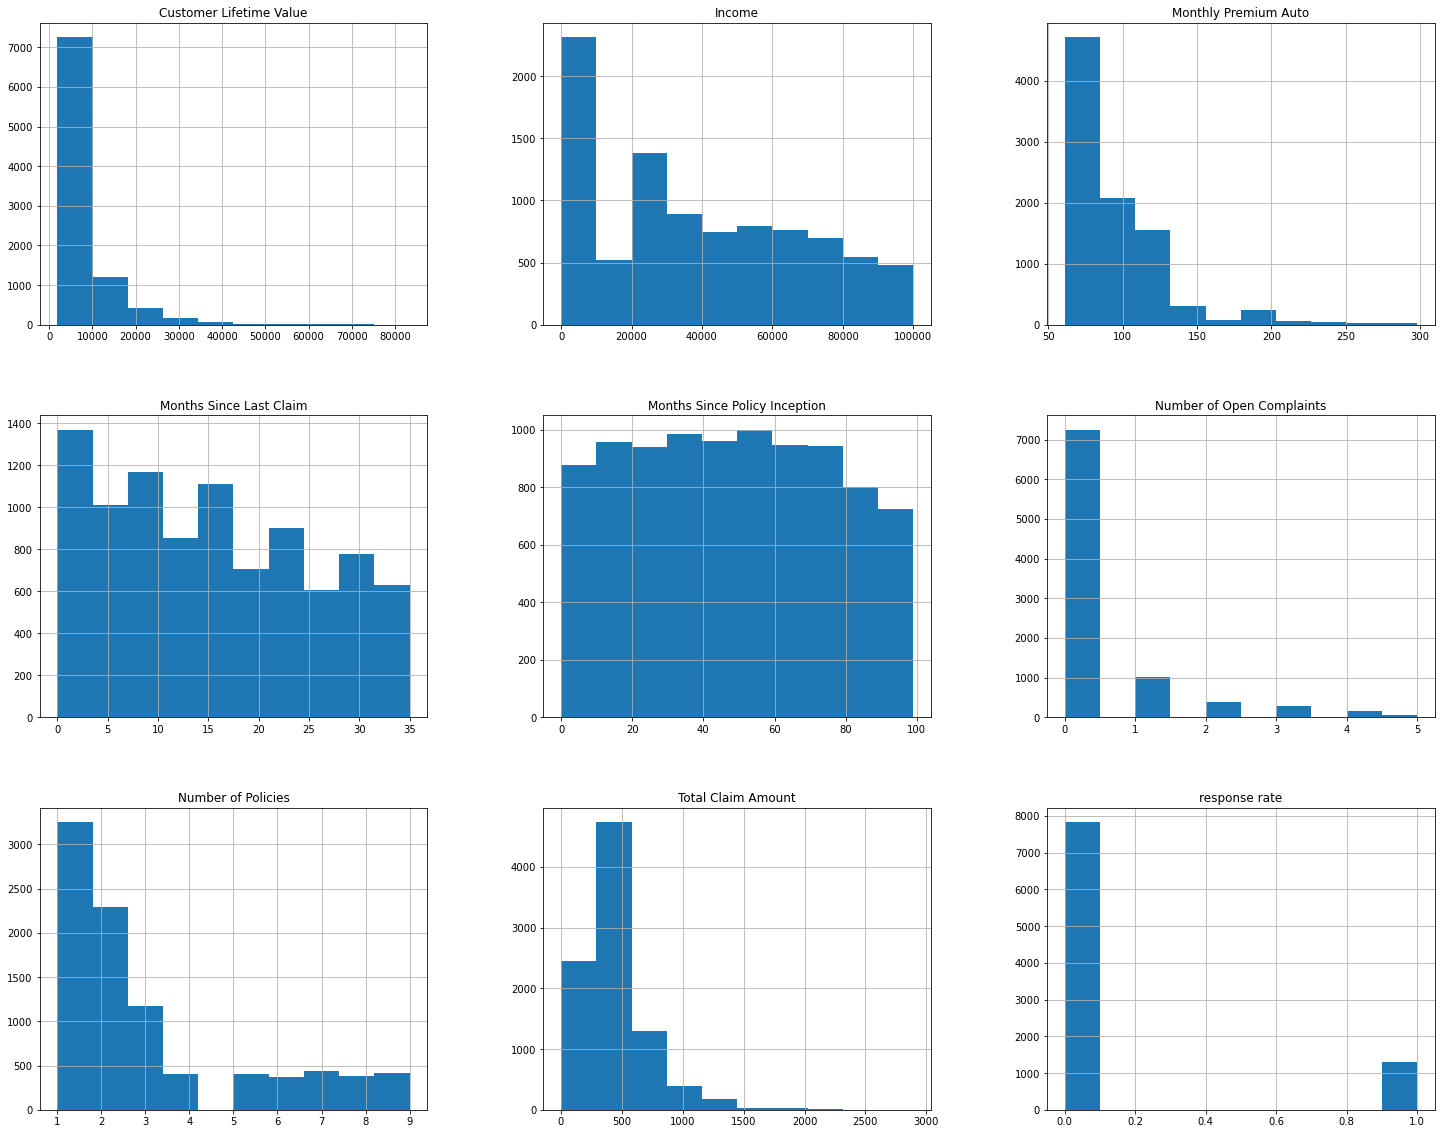

In [60]:
numericals.hist(bins=10, figsize=(25, 20))


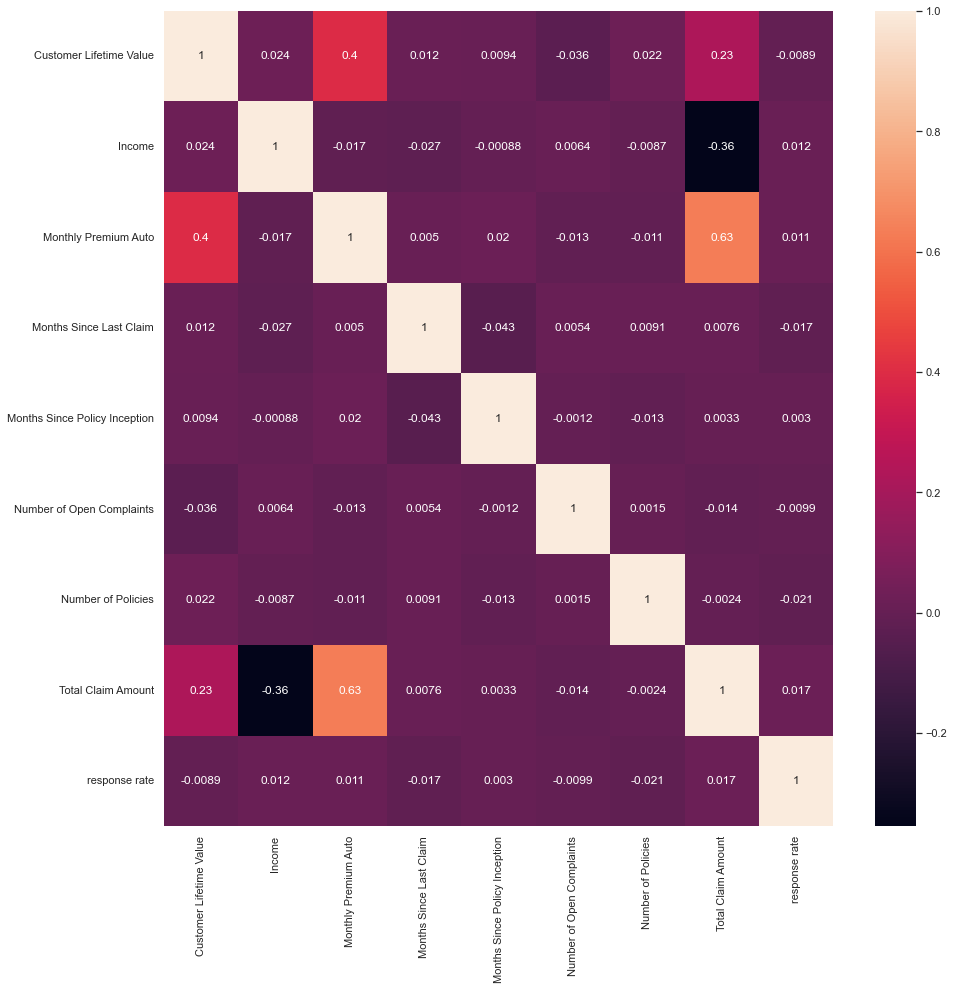

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,response rate
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.008930
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.011932
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.010966
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.016597
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.002952
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.009881
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,-0.020891
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.016877
response rate,-0.008930,0.011932,0.010966,-0.016597,0.002952,-0.009881,-0.020891,0.016877,1.000000


In [61]:
correlations_matrix = numericals.corr() #nothing has a high correlation that suggests it can be removed as a duplicate
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(correlations_matrix, annot=True)
plt.show()
correlations_matrix

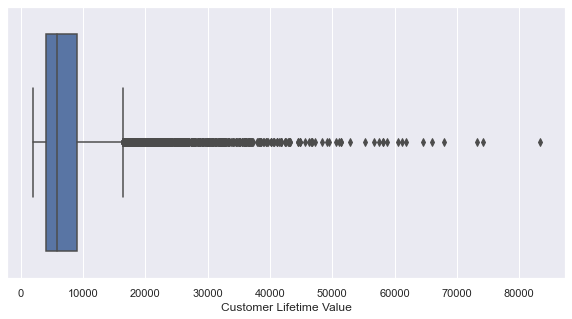

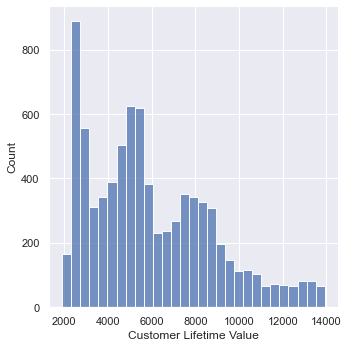

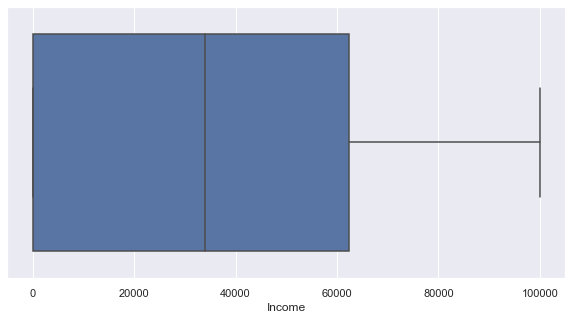

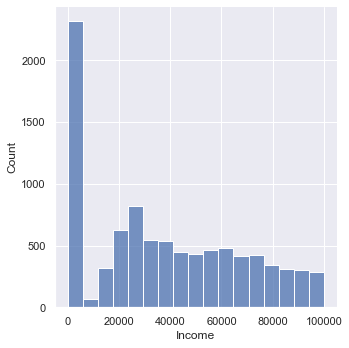

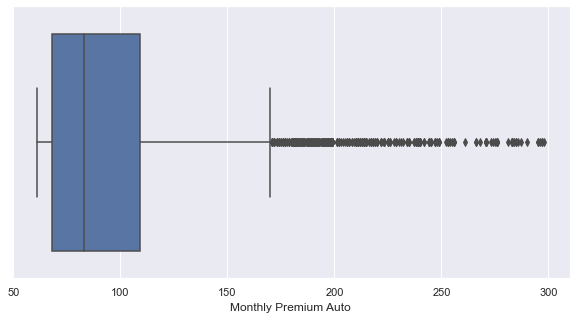

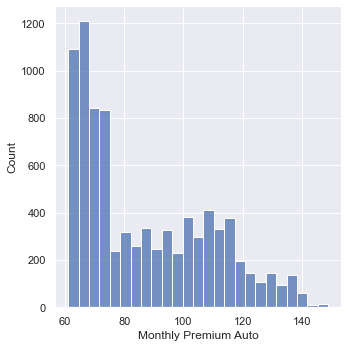

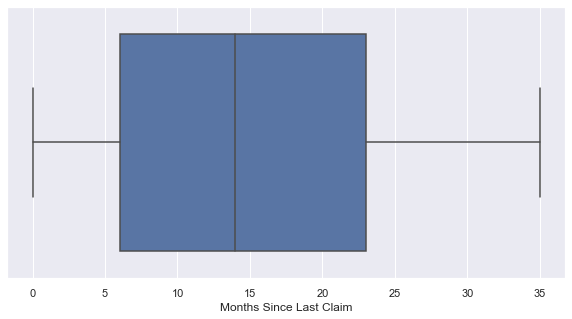

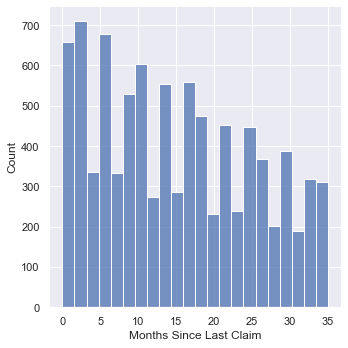

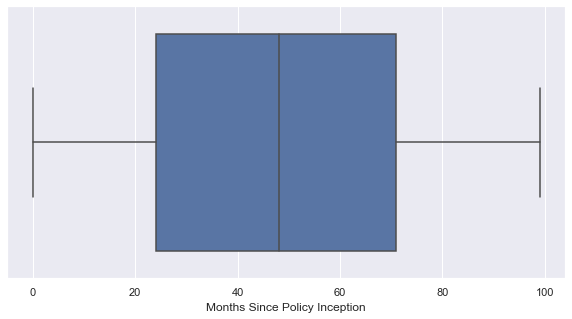

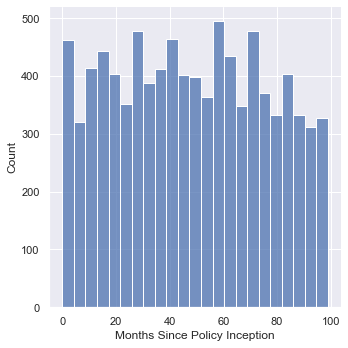

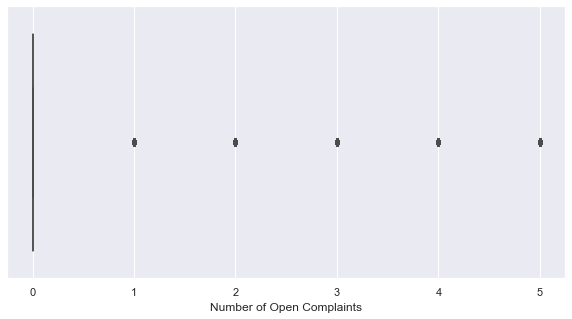

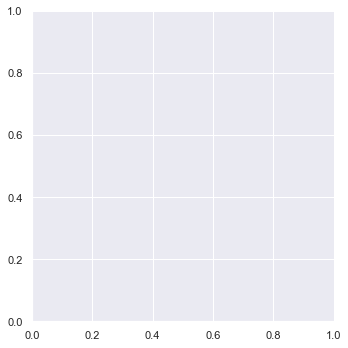

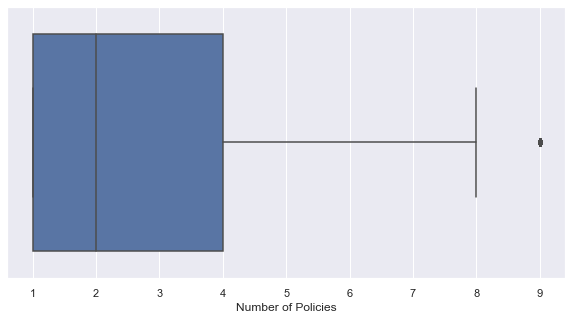

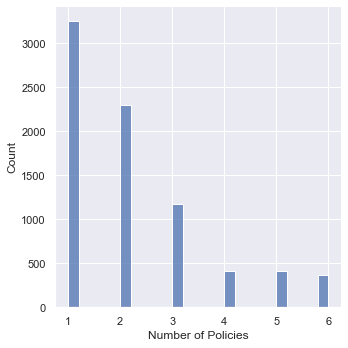

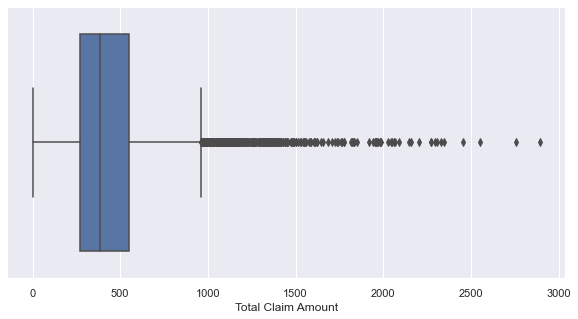

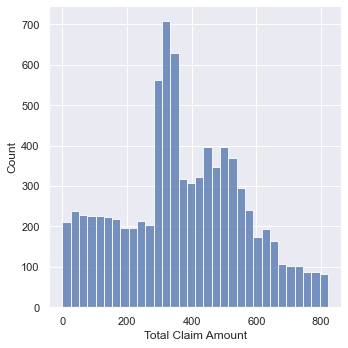

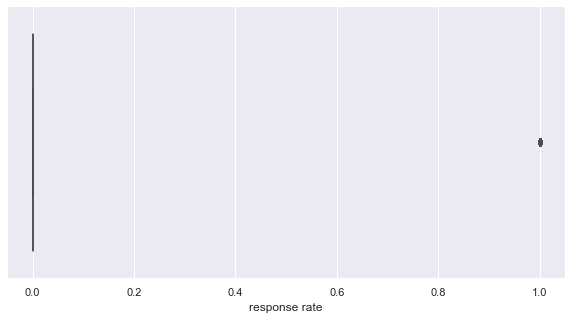

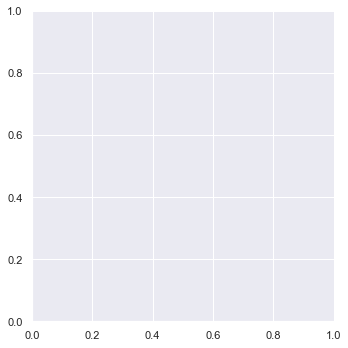

In [62]:
sns.set(rc = {'figure.figsize':(10,5)})
for column in numericals.columns:   
    sns.boxplot(x=numericals[column])
    plt.show()
    iqr = np.percentile(numericals[column],75) - np.percentile(numericals[column],25)
    data2 = numericals[(numericals[column]>np.percentile(numericals[column],25) - 1*iqr) & (numericals[column]<np.percentile(numericals[column],75) + 1*iqr)].copy()
    sns.displot(data2[column])
    plt.show()
sns.set(rc = {'figure.figsize':(10,5)})

In [63]:
data2.shape

(0, 9)

In [64]:
#Round 5

In [65]:
# X-y split.
# Normalize (numerical).

In [66]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,response rate
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,0
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,0
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,0
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,0


In [68]:
numericals = numericals.dropna()

In [69]:
categoricals.head()

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M,February
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M,January
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,February
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,January
6,IW72280,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,M,February


In [70]:
categoricals = categoricals.dropna()

In [71]:
y = numericals['Total Claim Amount']
X = numericals.drop(['Total Claim Amount', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = categoricals

In [72]:
X_num

,Customer Lifetime Value,Income,Monthly Premium Auto,response rate
0,4809.216960,48029,61,0
1,2228.525238,0,64,0
2,14947.917300,22139,100,0
3,22332.439460,49078,97,1
6,5035.035257,37405,63,0
...,...,...,...,...
10903,2771.663013,59855,74,0
10904,19228.463620,0,187,0
10906,5259.444853,61146,65,0
10907,23893.304100,39837,201,0


In [73]:
X_cat = X_cat.drop(columns = ['Customer' , 'Month'])
X_cat

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
6,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
10904,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
10906,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,M


In [74]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
pd.DataFrame(x_normalized, columns=X_num.columns)

(9134, 4)


,Customer Lifetime Value,Income,Monthly Premium Auto,response rate
0,0.035752,0.480381,0.000000,0.0
1,0.004059,0.000000,0.012658,0.0
2,0.160264,0.221432,0.164557,0.0
3,0.250953,0.490873,0.151899,1.0
4,0.038525,0.374121,0.008439,0.0
...,...,...,...,...
9129,0.010729,0.598664,0.054852,0.0
9130,0.212833,0.000000,0.531646,0.0
9131,0.041281,0.611576,0.016878,0.0
9132,0.270122,0.398446,0.590717,0.0


In [75]:
data_normalized = pd.DataFrame(x_normalized, columns=X_num.columns)

In [76]:
data_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,0.074999,0.084382,0.0,0.025744,0.047677,0.086754,1.0
Income,9134.0,0.376645,0.303857,0.0,0.000000,0.338959,0.623318,1.0
Monthly Premium Auto,9134.0,0.135946,0.145181,0.0,0.029536,0.092827,0.202532,1.0
response rate,9134.0,0.143201,0.350297,0.0,0.000000,0.000000,0.000000,1.0


In [77]:
data_normalized

,Customer Lifetime Value,Income,Monthly Premium Auto,response rate
0,0.035752,0.480381,0.000000,0.0
1,0.004059,0.000000,0.012658,0.0
2,0.160264,0.221432,0.164557,0.0
3,0.250953,0.490873,0.151899,1.0
4,0.038525,0.374121,0.008439,0.0
...,...,...,...,...
9129,0.010729,0.598664,0.054852,0.0
9130,0.212833,0.000000,0.531646,0.0
9131,0.041281,0.611576,0.016878,0.0
9132,0.270122,0.398446,0.590717,0.0


In [78]:
# Round 6

In [79]:
# Processing Data

# (Further processing...)

#    X-y split. (done)
#    Normalize (numerical). (done)
#    One Hot/Label Encoding (categorical).
#    Concat DataFrames

# Linear Regression
#    Train-test split.
#    Apply linear regression.

# Model Validation
#    Description:
#     R2.
#     MSE.
#     RMSE.
#     MAE.

In [80]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder().fit(X_cat)
encoded_cat_X = encoder.transform(X_cat).toarray()

encoded_columns = list()
dropped_columns = list()

for columns in encoder.categories_:
    condition = True
    for column in columns.tolist():
        if condition:
            dropped_columns.append(column)
            encoded_columns.append(column)
            condition = False
        else:
            encoded_columns.append(column)

categoricals_encoded = pd.DataFrame(data = encoded_cat_X, columns=encoded_columns)
categoricals_encoded = categoricals_encoded.drop(columns = dropped_columns)

categoricals_encoded.head()

,California,Nevada,Oregon,Washington,Yes,Extended,Premium,College,Doctor,High School or Below,...,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small,M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [81]:
X = pd.concat([data_normalized, categoricals_encoded], axis=1)
X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,response rate,California,Nevada,Oregon,Washington,Yes,Extended,...,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small,M
0,0.035752,0.480381,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.004059,0.000000,0.012658,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.160264,0.221432,0.164557,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.250953,0.490873,0.151899,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.038525,0.374121,0.008439,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [82]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [83]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

pd.concat([unique_name,pd.Series(predictions)],axis=1).head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,0
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,539.589497
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,350.506998
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,-22.958290
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,-37.245794
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,-0.423550


In [88]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

print(r2)
print(mse)
print(rmse)
print(mae)

print(np.mean(data['Customer Lifetime Value']))

0.7733634021797593
19812.03291722604
140.755223410096
96.89040536555791
8004.940474987079
